# SOK-1006 V23

## Arbeidskrav 3

### Frist onsdag 22. februar kl 14.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [188]:
import sympy as sp
import numpy as np
from IPython.display import Markdown
from matplotlib import pyplot as plt

In [189]:
# Etterspørsel
def x_d(p):
    return (500) - (3.2 * p)

#Tilbud
def x_s(p,t):
    return -100 + (4.3 * (p-t))

##### 1. Finn likevektspris og -kvantum for alle verdier av $t$.      

In [190]:
t, p=sp.symbols('t p', real=True, positive=True)

# Cond. for likevekt.  
eq_cond=sp.Eq(x_d(p), x_s(p,t))
display(eq_cond)

p_eq=sp.solve(eq_cond,p)
p_eq[0]

x_eq=x_s(p_eq[0], t)
x_eq

# Likevektspris. 
p_eq_fn=sp.lambdify(
    (t), 
    p_eq[0]
)

display(p_eq_fn(t))

# Likevektskvantum. 
x_eq_fn=sp.lambdify(
    (t), 
    x_eq
)

display(x_eq_fn(t))


# Kvantum i tall. 
x_eq_fn = float(x_eq_fn(0))
x_eq_fn

# Pris i tall. 
p_eq_fn = float(p_eq_fn(0))
p_eq_fn


print(f"pris er {p_eq_fn}")
print(f"kvantum er {x_eq_fn}")

Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

0.573333333333333*t + 80.0

244.0 - 1.83466666666667*t

pris er 80.0
kvantum er 244.0


##### 2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny. 

In [180]:
producer_surplus=sp.integrate(p_eq_fn-x_s(p,0),(p,0,x_eq_fn))
display(producer_surplus)
producer_surplus4=sp.integrate(p_eq_fn-x_s(p,4),(p,4,x_eq_fn))
display(producer_surplus4)

consumer_surplus=round(sp.integrate(x_d(p)-p_eq_fn,(p,0,x_eq_fn)))
display(consumer_surplus)
consumer_surplus4=round(sp.integrate(x_d(p)-p_eq_fn,(p,4,x_eq_fn)))
display(consumer_surplus4)

-84082.4000000000

-80640.0000000000

7222

5568

In [177]:
def avgiftprov(t):
    return t*x_eq_fn(0,t)

display(avgiftprov)

<function __main__.avgiftprov(t)>

##### 3. Tegn likevekten for $t=0$ og fargelegg KO og PO.  

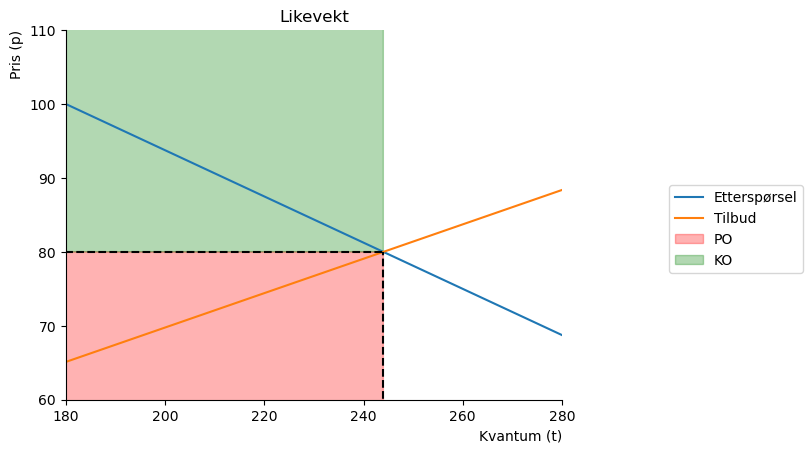

In [154]:
p_num=np.linspace(0.1,100,100)

x = np.linspace (180, x_eq_fn, 200)


#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (t)', loc='right')
                ax.set(xlim=(180,280))
                ax.set(ylim=(60,110))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

# linjer. 
ax.vlines(x_eq_fn,0,p_eq_fn, color = "black", linestyle = "dashed")
ax.hlines(p_eq_fn,0,x_eq_fn, color = "black", linestyle = "dashed")


ax.fill_between(x,p_eq_fn,x_d(x), color = "red",alpha = 0.3,label='PO')
ax.fill_between(x,x_s(x,0),p_eq_fn, color = "green",alpha = 0.3,label='KO')

# tittel
ax.set_title('Likevekt')

#vis navnene utenfor plottet:

ax.legend(bbox_to_anchor=(1.5,0.6));

##### 4. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny. 

In [135]:
eq_cond4=sp.Eq(x_d(p), x_s(p,4))
p_eq4=sp.solve(eq_cond4,p)
x_eq4=x_s(p_eq[0], 4)
p_eq_fn4=sp.lambdify(
    (t), 
    p_eq4[0]
)


x_eq_fn4=sp.lambdify(
    (t), 
    x_eq4
)


x_eq_fn4 = round(x_eq_fn4(4))
display(x_eq_fn4)

# Pris i tall. 
p_eq_fn4 = round(p_eq_fn4(4))
display(p_eq_fn4)


237

82

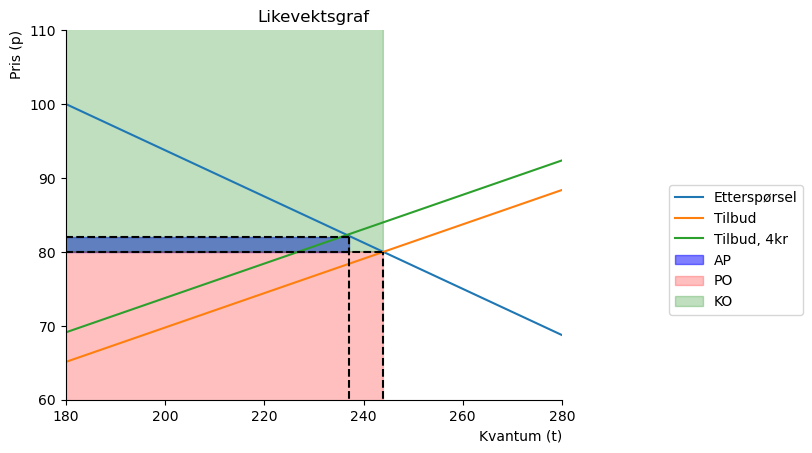

In [160]:
p_num=np.linspace(0.1,100,100)
q = np.linspace(0,x_eq_fn4,100)

def create_ax2():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (t)', loc='right')
                ax.set(xlim=(180,280))
                ax.set(ylim=(60,110))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene
ax.plot(x_d(p_num),p_num, label='Etterspørsel')
ax.plot(x_s(p_num, 0),p_num, label='Tilbud')
ax.plot(x_s(p_num, 4),p_num, label='Tilbud, 4kr')

ax.vlines(x_eq_fn,0,p_eq_fn, color = "black", linestyle = "dashed")
ax.hlines(p_eq_fn,0,x_eq_fn, color = "black", linestyle = "dashed")
ax.vlines(x_eq_fn4,0,p_eq_fn4, color = "black", linestyle = "dashed")
ax.hlines(p_eq_fn4,0,x_eq_fn4, color = "black", linestyle = "dashed")

ax.fill_between(q,p_eq_fn4, p_eq_fn4-2, color = "blue",alpha = 0.5,label='AP')

ax.fill_between(x,p_eq_fn, x_d(x), color = "red",alpha = 0.25,label='PO')
ax.fill_between(x,p_eq_fn, x_s(x,0), color = "green",alpha = 0.25,label='KO')


# Tittel. 
ax.set_title('Likevektsgraf')

#vis navnene utenfor plottet:
ax.legend(bbox_to_anchor=(1.5,0.6));


##### 5. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [187]:
tbl=f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   | ${p_eq_fn}$    | ${p_eq_fn4}$| ${p_eq_fn4 - p_eq_fn}$ |
|Produsentpris  | ${p_eq_fn}$|  ${p_eq_fn4-4}$ | ${p_eq_fn4-4-p_eq_fn}$ |
|Kvantum  | ${x_eq_fn}$ | ${x_eq_fn4}$  | ${x_eq_fn4-x_eq_fn}$   |
| Konsumentoverskudd: | ${consumer_surplus}$ |${consumer_surplus4}$ |  ${consumer_surplus4-consumer_surplus}$   |
| Produsentoverskudd: | ${round(producer_surplus)}$| ${round(producer_surplus4)}$ |  ${round(producer_surplus4-producer_surplus)}$ |
| KO + PO:    |   ${round(consumer_surplus+producer_surplus)}$ | ${round(consumer_surplus4+producer_surplus4)}$ | ${round((consumer_surplus4+producer_surplus4)-(consumer_surplus+producer_surplus))}$ |
|Skatteproveny| 0  | 2| 2|
| Dødvektstap  |0   |  1 |1|
"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   | $80.0$    | $82$| $2.0$ |
|Produsentpris  | $80.0$|  $78$ | $-2.0$ |
|Kvantum  | $244.0$ | $237$  | $-7.0$   |
| Konsumentoverskudd: | $7222$ |$5568$ |  $-1654$   |
| Produsentoverskudd: | $-84082$| $-80640$ |  $3442$ |
| KO + PO:    |   $-76860$ | $-75072$ | $1788$ |
|Skatteproveny| 0  | 2| 2|
| Dødvektstap  |0   |  1 |1|
